# Importation des bibliothèques

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Configuration des paramètres 

In [8]:
base_dir = "./Livrable 1"
img_height = 28
img_width = 28
batch_size = 32


# Chargement du jeu de données d'images

1- validation_split : Divise automatiquement le jeu de données en ensembles d'entraînement et de validation, ici configuré pour 20% de validation.

2- subset : L'option "both" est sélectionnée pour inclure à la fois les ensembles d'entraînement et de validation.

3- seed : Utilisé pour garantir la reproductibilité, fixé à 42.

4- image_size : Définit la taille des images à (28, 28), correspondant aux valeurs définies précédemment.

5- batch_size : Utilisé pour spécifier la taille des mini-lots lors de l'entraînement du modèle, reprenant la valeur définie précédemment.


Les ensembles d'entraînement et de test résultants sont stockés dans les variables train_set et test_set.

In [9]:
train_set, test_set = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 41407 files belonging to 5 classes.
Using 33126 files for training.
Using 8281 files for validation.


# Extraction d'un lot d'images et de labels pour l'entraînement et les tests

In [10]:
img_train, labels_train = next(iter(train_set))
img_test, labels_test = next(iter(test_set))

# Conversion des données d'images en tableaux NumPy

Cette cellule convertit les données d'images extraites des ensembles d'entraînement (img_train) et de test (img_test) en tableaux NumPy.

Les tableaux résultants sont stockés dans les variables X_train pour les données d'entraînement et X_test pour les données de test. 

Cette conversion en tableaux NumPy peut être utile pour travailler avec certaines bibliothèques ou opérations spécifiques nécessitant ce format de données.

In [11]:
X_train = img_train.numpy()
X_test = img_test.numpy()

# Conversion des Labels en tableaux NumPy

Cette cellule convertit les labels associées aux images des ensembles d'entraînement (labels_train) et de test (labels_test) en tableaux NumPy. 

Les tableaux résultants sont stockés dans les variables Y_train pour les étiquettes d'entraînement et Y_test pour les étiquettes de test.

La conversion en tableaux NumPy facilite le traitement ultérieur des étiquettes, notamment lors de l'évaluation des performances du modèle.

In [12]:
Y_train = labels_train.numpy()
Y_test = labels_test.numpy()

# Réorganisation des données d'entraînement

Cette cellule remodèle les données d'entraînement (X_train) en un tableau à deux dimensions. La méthode reshape est utilisée pour transformer les données en un tableau où chaque ligne correspond à une image aplatie (sous forme de vecteur), et chaque colonne représente les différentes valeurs de pixels.

X : Contient les données d'entraînement remodelées, où chaque ligne correspond à une image aplatie.

Y : Contient les étiquettes correspondantes aux données d'entraînement.


In [13]:
X = X_train.reshape(X_train.shape[0], -1)
Y = Y_train

# Binaire de classification des Labels

Cette cellule modifie les étiquettes d'entraînement (Y) en un format binaire pour une tâche de classification binaire. Toutes les valeurs différentes de 1 sont changées à 0, transformant ainsi le problème en une tâche de classification binaire où l'objectif est de distinguer les exemples de la classe 1 des autres.

In [14]:
Y[Y != 1] = 0

# Prétraitement des données de test pour la classification binaire

Cette cellule remodèle les données de test (X_test) en un tableau à deux dimensions, adapté pour une utilisation dans une tâche de classification binaire. 

De plus, elle modifie les étiquettes de test (Y_test), les transformant en un format binaire où toutes les valeurs différentes de 1 sont changées à 0. 

Ces étapes de prétraitement sont essentielles pour préparer les données de test en vue de l'évaluation d'un modèle de classification binaire.

In [15]:
X_test = X_test.reshape(X_train.shape[0], -1)
Y_test[Y_test != 1] = 0

# Configuration des classificateurs pour l'ensemble Bagging

Cette cellule crée deux classificateurs. Le premier, "base_classifier", est un arbre de décision avec une profondeur maximale de 4 et une graine aléatoire fixée à 42. 

Le second, "bagging_classifier", est un classificateur Bagging utilisant le base_classifier comme estimateur de base, avec 100 estimateurs (arbres de décision) et une graine aléatoire fixée à 42 également. 

Ces classificateurs sont configurés pour être utilisés dans un ensemble Bagging, une technique d'ensemble qui combine plusieurs modèles pour améliorer la performance prédictive et réduire le surajustement.

In [16]:
base_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Entraînement de l'ensemble Bagging

Cette cellule utilise la méthode fit pour entraîner le classificateur Bagging (bagging_classifier) sur les données d'entraînement. 

Les données d'entraînement (X) et les étiquettes correspondantes (Y) sont utilisées pour former l'ensemble Bagging, qui consiste en un ensemble de classificateurs basés sur des arbres de décision. 

Ce processus permet au modèle d'apprendre à partir des exemples d'entraînement et d'acquérir la capacité de généraliser à de nouvelles données.

In [17]:
bagging_classifier.fit(X, Y)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   random_state=42),
                  n_estimators=100, random_state=42)

# Évaluation de la performance du modèle sur l'ensemble de test

Cette cellule évalue les performances du modèle entraîné sur l'ensemble de test. 

La méthode "score" du classificateur Bagging (bagging_classifier) est utilisée pour calculer la précision du modèle sur les données de test (X_test). 

La précision est ensuite imprimée à l'écran. Cette évaluation fournit une mesure de la capacité du modèle à généraliser à de nouvelles données non vues pendant l'entraînement.

In [18]:
# Evaluate the model on the test set
test_accuracy = bagging_classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 81.25%


# Prédictions sur l'ensemble de test

Cette cellule utilise le classificateur Bagging (bagging_classifier) pour effectuer des prédictions sur l'ensemble de test (X_test). 

Les prédictions résultantes sont stockées dans la variable y_pred. Ce processus permet d'obtenir les prédictions du modèle sur les données de test, ce qui peut être utile pour une analyse plus approfondie de la performance du modèle et pour l'évaluation de la qualité des prédictions sur de nouvelles données.

In [19]:
y_pred = bagging_classifier.predict(X_test)

# Seuillage pour des prédictions binaires

Cette cellule applique un seuillage aux prédictions continues (y_pred) du modèle pour les convertir en prédictions binaires. 

Les valeurs supérieures à 0.5 sont considérées comme la classe positive (1), tandis que les valeurs inférieures ou égales à 0.5 sont considérées comme la classe négative (0). 

Les prédictions binaires résultantes sont stockées dans la variable binary_predictions. Ce seuillage est couramment utilisé pour transformer les sorties de modèles de régression en prédictions de classification binaire.


In [20]:
binary_predictions = (y_pred > 0.5).astype(int)

# Évaluation de la précision du modèle avec des prédictions binaires

Cette cellule évalue la précision du modèle sur l'ensemble de test en utilisant les prédictions binaires (binary_predictions). 

La fonction accuracy_score de scikit-learn est utilisée pour calculer la précision en comparant les prédictions binaires avec les véritables étiquettes de test (Y_test). Le résultat est ensuite imprimé à l'écran, fournissant une mesure de la précision du modèle dans la tâche de classification binaire.

In [21]:
test_accuracy_binary = accuracy_score(Y_test, binary_predictions)
print(f'Test Accuracy (Binary): {test_accuracy_binary * 100:.2f}%')


Test Accuracy (Binary): 81.25%


# Affichage d'une image à partir des données d'entraînement

Cette cellule affiche une image des données d'entraînement. L'image sélectionnée est celle correspondant à l'indice 10 dans les données d'entraînement (X_train). 

La fonction plt.imshow est utilisée pour afficher l'image à l'aide de la bibliothèque Matplotlib. 

La conversion de l'image en type "uint8" est effectuée pour s'assurer que les valeurs des pixels sont interprétées correctement lors de l'affichage.

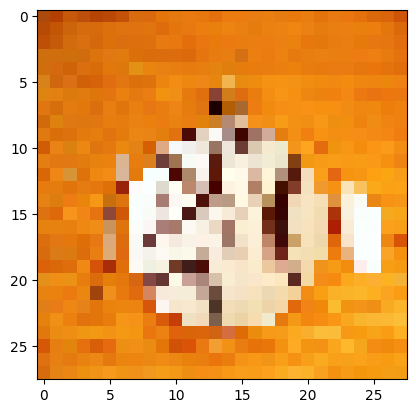

In [22]:
image = [X_train[10]]
test_image = [X_train[10]]
test_image_np = np.array(test_image)

plt.imshow(image[0].astype("uint8"))

# Aplatissement de l'image en un vecteur

Cette cellule aplatisse l'image sélectionnée (image[0]) en un vecteur unidimensionnel à deux reprises. 
Les deux approches utilisées sont :

1- image_flat = image[0].flatten() : Utilisation de la méthode flatten() pour créer un vecteur unidimensionnel à partir de l'image.

2- image_flattened = image[0].reshape((1, -1)) : Utilisation de la méthode reshape pour remodeler l'image en une ligne (1) et de nombre de colonnes (-1), permettant d'obtenir un vecteur unidimensionnel.

In [23]:
image_flat = image[0].flatten()
image_flattened = image[0].reshape((1, -1))

# Forme du vecteur aplati de l'image

Cette cellule utilise l'attribut shape pour afficher la forme du vecteur aplati de l'image (image_flattened). 

La forme résultante indique le nombre de lignes (1, car l'image est aplatie en un vecteur) et le nombre total d'éléments dans le vecteur, correspondant à la taille originale de l'image une fois aplatie.

In [24]:
image_flattened.shape

(1, 2352)

# Prédiction du modèle sur une image individuelle

Cette cellule utilise le modèle Bagging entraîné (bagging_classifier) pour effectuer une prédiction sur une image individuelle préalablement aplatie (image_flattened). 

La fonction predict est utilisée pour obtenir la prédiction du modèle sur cette image spécifique. Ce processus permet d'obtenir la sortie du modèle pour une image particulière, ce qui peut être utile pour comprendre comment le modèle classe des exemples individuels.

In [25]:
bagging_classifier.predict(image_flattened)

array([1], dtype=int32)

# Fonction d'affichage d'échantillons d'images avec les labels réelles et prédites

Cette cellule définit une fonction show_sample_images qui prend en paramètres une liste d'images (images), les étiquettes réelles correspondantes (true_labels), et les étiquettes prédites (predicted_labels). 

La fonction affiche ensuite les images avec les étiquettes réelles et prédites sous chaque image dans une figure Matplotlib.

In [26]:
# Function to show images with true and predicted labels
def show_sample_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(12, 4))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(img_height, img_width, 3))
        plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}', fontsize=10)
        plt.axis('off')


# Visualisation de quelques prédictions du modèle

Cette cellule sélectionne un échantillon aléatoire de quelques images (num_samples) à partir de l'ensemble de test (X_test). 

Les étiquettes réelles correspondantes (sample_labels) et les prédictions binaires du modèle (sample_predictions) pour ces échantillons sont également extraites.

In [27]:
# Visualize a few predictions
num_samples = 5
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[sample_indices]
sample_labels = Y_test[sample_indices]
sample_predictions = binary_predictions[sample_indices]

# Affichage des échantillons d'images avec les labels réelles et prédites

Cette cellule utilise la fonction show_sample_images définie précédemment pour afficher un échantillon d'images (sample_images) avec les étiquettes réelles (sample_labels) et les étiquettes prédites (sample_predictions). 

La visualisation permet de comparer visuellement les prédictions du modèle avec les véritables étiquettes pour un petit ensemble d'échantillons, facilitant ainsi l'interprétation de la performance du modèle sur ces exemples particuliers.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


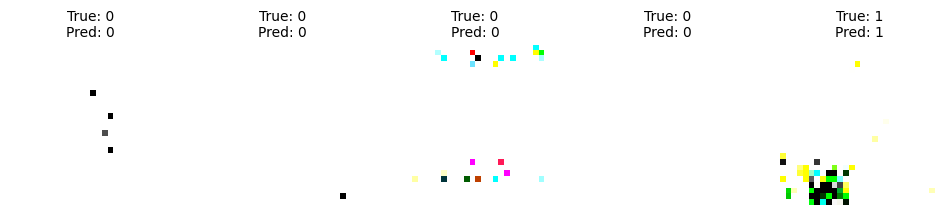

In [28]:
# Display the sample images
show_sample_images(sample_images, sample_labels, sample_predictions)
plt.show()

# Importation des métriques d'évaluation

Cette cellule importe les métriques d'évaluation accuracy_score et confusion_matrix à partir de la bibliothèque scikit-learn. 

Ces métriques sont couramment utilisées pour évaluer la performance des modèles de classification. 

La confusion_matrix fournit une matrice de confusion, tandis que l'accuracy_score donne la précision globale du modèle. Ces métriques peuvent être utilisées pour une évaluation plus détaillée de la performance du modèle sur l'ensemble de test.

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcul et affichage de la matrice de confusion

In [30]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, binary_predictions)


In [31]:
import seaborn as sns

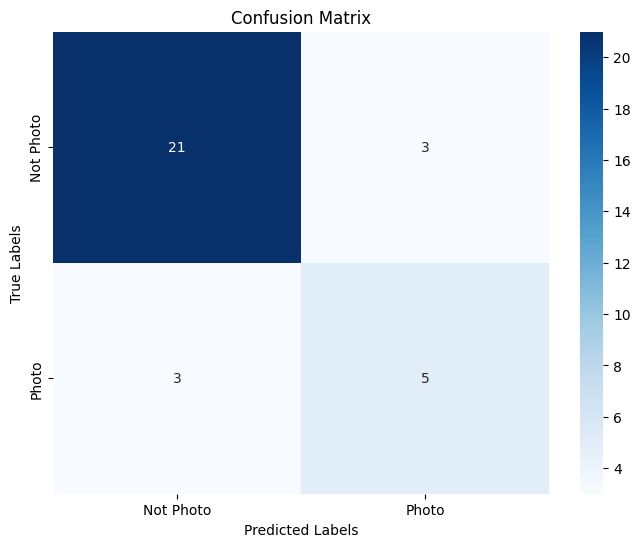

In [32]:
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Photo', 'Photo'], yticklabels=['Not Photo', 'Photo'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [34]:
import joblib 
joblib.dump(bagging_classifier, 'bagging.joblib')

['bagging.joblib']